In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cot_reports as cot

In [ ]:
# Example: cot_all()
# df = cot.cot_all(cot_report_type='legacy_fut')
# cot_all() downloads the historical bulk file and all remaining single year files of the specified report type.  Returns the data as dataframe.

In [34]:
df = cot.cot_year(year = 2024,cot_report_type='legacy_fut')

Selected: legacy_fut
Downloaded single year data from: 2024
Stored the file annual.txt in the working directory.


In [35]:
df1=df

In [ ]:
df1

In [36]:
print(df.columns)

Index(['Market and Exchange Names', 'As of Date in Form YYMMDD',
       'As of Date in Form YYYY-MM-DD', 'CFTC Contract Market Code',
       'CFTC Market Code in Initials', 'CFTC Region Code',
       'CFTC Commodity Code', 'Open Interest (All)',
       'Noncommercial Positions-Long (All)',
       'Noncommercial Positions-Short (All)',
       ...
       'Concentration-Gross LT =8 TDR-Long (Other)',
       'Concentration-Gross LT =8 TDR-Short(Other)',
       'Concentration-Net LT =4 TDR-Long (Other)',
       'Concentration-Net LT =4 TDR-Short (Other)',
       'Concentration-Net LT =8 TDR-Long (Other)',
       'Concentration-Net LT =8 TDR-Short (Other)', 'Contract Units',
       'CFTC Contract Market Code (Quotes)',
       'CFTC Market Code in Initials (Quotes)',
       'CFTC Commodity Code (Quotes)'],
      dtype='object', length=129)


In [ ]:
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_columns', 20)
# # Keyword to search for
# keyword = 'GOLD'

# # Filtering the DataFrame
# filtered_df = df1[df1.apply(lambda row: row.astype(str).str.contains(keyword).any(), axis=1)]

# print(filtered_df)

In [37]:
# Filter the data to only include Forex and Metals
forex_df = df[df['CFTC Market Code in Initials'] == 'FX']
metals_df = df[df['CFTC Market Code in Initials'] == 'METALS']

In [38]:
# Filter the data to only include "Non-Commercial" traders
forex_non_commercial = forex_df[forex_df['Noncommercial Positions-Long (All)'] != 0]
metals_non_commercial = metals_df[metals_df['Noncommercial Positions-Long (All)'] != 0]

In [39]:
# Calculate the net positions
forex_non_commercial['NET_POSITIONS'] = forex_non_commercial['Noncommercial Positions-Long (All)'] - forex_non_commercial['Noncommercial Positions-Short (All)']
metals_non_commercial['NET_POSITIONS'] = metals_non_commercial['Noncommercial Positions-Long (All)'] - metals_non_commercial['Noncommercial Positions-Short (All)']

In [40]:
# Group the data by date and calculate the mean values
forex_weekly = forex_non_commercial.groupby('As of Date in Form YYYY-MM-DD').mean()
metals_weekly = metals_non_commercial.groupby('As of Date in Form YYYY-MM-DD').mean()

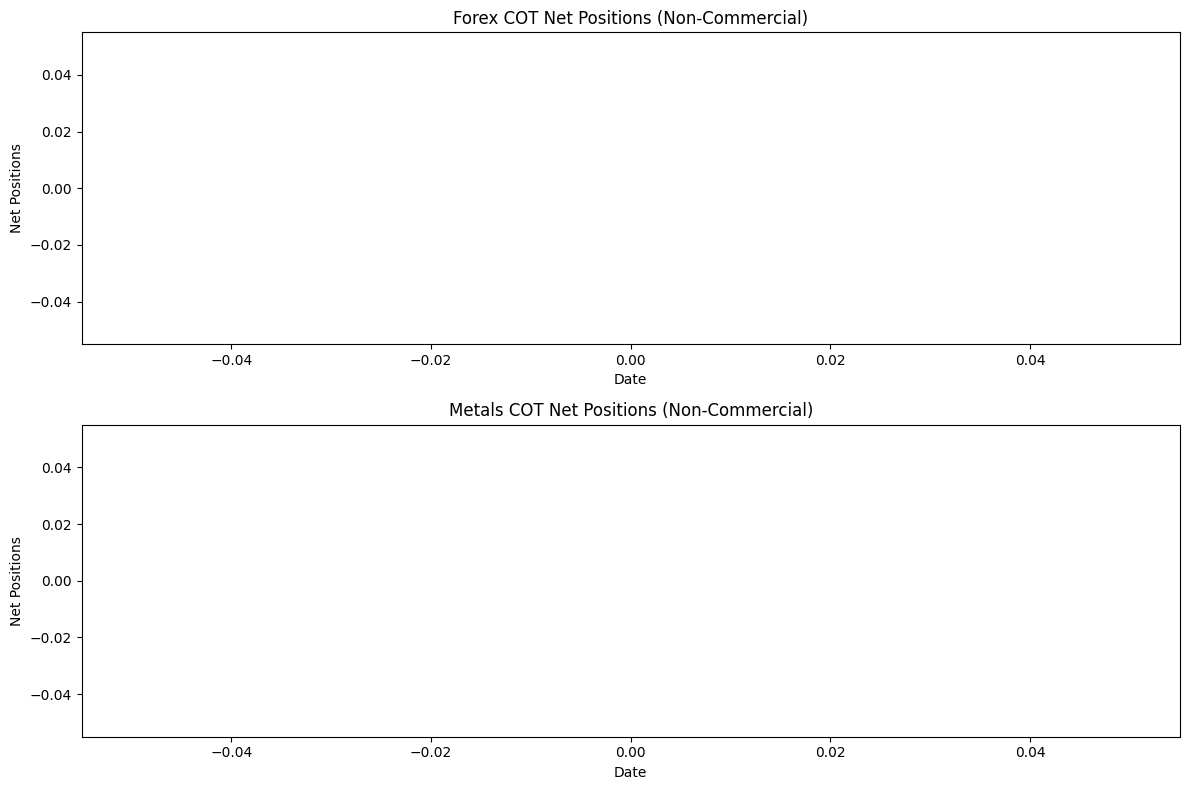

In [45]:
# Plot the net positions over time
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Forex net positions
ax1.plot(forex_weekly.index, forex_weekly['NET_POSITIONS'])
ax1.set_title('Forex COT Net Positions (Non-Commercial)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Net Positions')

# Metals net positions
ax2.plot(metals_weekly.index, metals_weekly['NET_POSITIONS'])
ax2.set_title('Metals COT Net Positions (Non-Commercial)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Net Positions')

plt.tight_layout()
plt.show()